<a href="https://colab.research.google.com/github/imlilalex/WINCFinalAssignment/blob/main/Final_assignment_CO2_emissions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Questions to Answer

1.   What is the biggest predictor of a large CO2 output per capita of a country?
2.   Which countries are making the biggest strides in decreasing CO2 output?
3.   Which non-fossil fuel energy technology will have the best price in the future?


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

%load_ext google.colab.data_table

In [ ]:
emissions_file = 'annual-co2-emissions-per-country.csv'
capita_file = 'co-emissions-per-capita.csv'
gdp_file = 'gdp-per-capita-maddison-2020.csv'
energy_file = 'per-capita-energy-source-stacked.csv'
cars_file = 'road-motor-vehicle-ownership-per-1000-people-2014.csv'

cost_file = 'levelized-cost-of-energy.csv'

emissions = pd.read_csv(emissions_file)
capita = pd.read_csv(capita_file)
gdp = pd.read_csv(gdp_file)
energy = pd.read_csv(energy_file)
cars = pd.read_csv(cars_file)

cost = pd.read_csv(cost_file)

# What is the biggest predictor of a large CO2 output per capita of a country?

In [ ]:
# emissions columns = entity, code, year, annual co2 emissions
# capita columns = entity, code, year, annual co2 emissions (per capita)
# gdp columns = entity, code, year, GDP per capita, 417485-annotations


emissions_capita = pd.merge(emissions, capita, on=['Entity', 'Code', 'Year'])
emissions_capita_gdp = pd.merge(emissions_capita, gdp, on=['Entity', 'Code', 'Year'])
energy_cars = pd.merge(energy, cars, on=['Entity', 'Code', 'Year'])

emissions_capita_gdp.drop(columns = ["417485-annotations", "Code"], inplace = True)
energy_cars.drop(columns = 'Code', inplace = True)

df = pd.merge(emissions_capita_gdp, energy_cars, on=['Entity', 'Year'])

# only consider 2014 (most recent year with complete data)
df_2014 = df[df['Year'].astype(str).str.contains('2014')]


df_2014.columns = ['country', 'year', 'annual_co2', 'annual_co2_per_cap', 'gdp_per_cap', 'fossil_per_cap', 'nuclear_per_cap', 'renewable_per_cap', 'motor_vehicles_per_1000']

Text(0.5, 1.0, 'Comparison Between CO2 Emissions and Fossil Fuel Usage per Capita')

<Figure size 432x288 with 0 Axes>

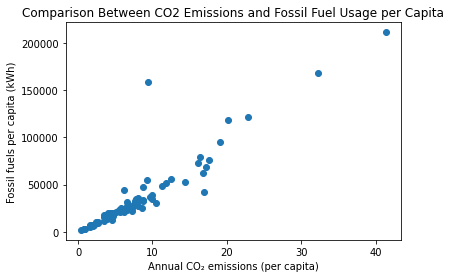

In [ ]:
# plot emissions per capita vs. fossil fuels per capita
fig3 = plt.figure()
fig3, ax = plt.subplots()

plt.scatter(df_2014.iloc[:, 3], df_2014.iloc[:, -4])

ax.set_ylabel("Fossil fuels per capita (kWh)")
ax.set_xlabel("Annual CO₂ emissions (per capita)")
ax.set_title("Comparison Between CO2 Emissions and Fossil Fuel Usage per Capita")

Text(0.5, 1.0, 'Comparison Between CO2 Emissions and GDP per Capita')

<Figure size 432x288 with 0 Axes>

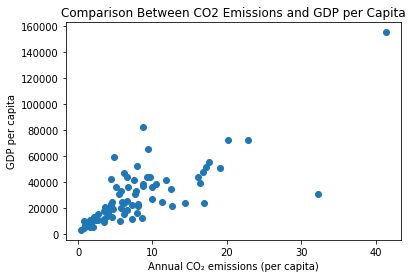

In [ ]:
# plot emissions per capita vs. gdp
fig4 = plt.figure()
fig4, ax = plt.subplots()

plt.scatter(df_2014.iloc[:, 3], df_2014.iloc[:, 4])

ax.set_ylabel("GDP per capita")
ax.set_xlabel("Annual CO₂ emissions (per capita)")
ax.set_title("Comparison Between CO2 Emissions and GDP per Capita")

Text(0.5, 1.0, 'Comparison Between CO2 Emissions and Motor Vehicles')

<Figure size 432x288 with 0 Axes>

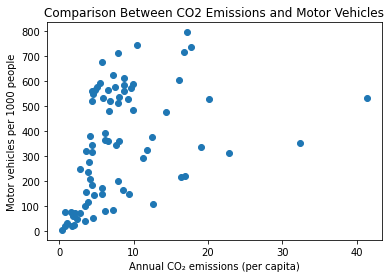

In [ ]:
# plot emissions per capita vs. gdp
fig4 = plt.figure()
fig4, ax = plt.subplots()

plt.scatter(df_2014.iloc[:, 3], df_2014.iloc[:, -1])

ax.set_ylabel("Motor vehicles per 1000 people")
ax.set_xlabel("Annual CO₂ emissions (per capita)")
ax.set_title("Comparison Between CO2 Emissions and Motor Vehicles")

In [ ]:
# calculate pearson correlation
fossil_correlation = df_2014[['fossil_per_cap','annual_co2_per_cap']].corr().iloc[0::2,-1]
#  value = 0.912807

gdp_correlation = df_2014[['gdp_per_cap','annual_co2_per_cap']].corr().iloc[0::2,-1]
#  value = 0.745111

cars_correlation = df_2014[['motor_vehicles_per_1000','annual_co2_per_cap']].corr().iloc[0::2,-1]
#  value = 0.399565

nuclear_correlation = df_2014[['nuclear_per_cap','annual_co2_per_cap']].corr().iloc[0::2,-1]
#  value = -0.007222

renewable_correlation = df_2014[['renewable_per_cap','annual_co2_per_cap']].corr().iloc[0::2,-1]
#  value = 0.03402

In [ ]:
# df_2014.sort_values("fossil_per_cap").tail()
df_2014.sort_values("annual_co2_per_cap").tail()

,country,year,annual_co2,annual_co2_per_cap,gdp_per_cap,fossil_per_cap,nuclear_per_cap,renewable_per_cap,motor_vehicles_per_1000
57,Saudi Arabia,2014,612841900.0,19.076452,50693.0,94626.398438,0.0,4.020368,336
37,Kuwait,2014,75623530.0,20.104140,72508.0,118293.093750,0.0,2.408300,527
73,United Arab Emirates,2014,201713380.0,22.828695,72601.0,121644.515625,0.0,93.637390,313
69,Trinidad and Tobago,2014,46891730.0,32.324345,30842.0,168166.906250,0.0,8.930732,353
54,Qatar,2014,91548760.0,41.341140,155069.0,211058.609375,0.0,156.247620,532


# Which countries are making the biggest strides in decreasing CO2 output?

In [ ]:
output_df = emissions.pivot(index='Entity', columns='Year', values='Annual CO₂ emissions')
cap_output_df =  capita.pivot(index='Entity', columns='Year', values='Annual CO₂ emissions (per capita)')

# Select only last 30 years
output_df = output_df.drop(columns = output_df.columns[:-31])
cap_output_df = cap_output_df.drop(columns = cap_output_df.columns[:-31])

# Calculate a more relative change between 1991 and 2021
output_df['change'] = (output_df.loc[:, 2021] - output_df.loc[:, 1991])
output_df['relative'] = (output_df.loc[:, 'change'] / output_df.loc[:, 1991]) * 100

cap_output_df['change'] = (cap_output_df.loc[:, 2021] - cap_output_df.loc[:, 1991])
cap_output_df['relative'] = (cap_output_df.loc[:, 'change'] / cap_output_df.loc[:, 1991]) * 100

# Sort to get biggest/smallest changes
big_change = output_df.sort_values("relative")
cap_big_change = cap_output_df.sort_values("relative")

big_change['country'] = big_change.index
cap_big_change['country'] = cap_big_change.index


cap_big_change.sort_values("relative").head(10)

Year,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,...,2015,2016,2017,2018,2019,2020,2021,change,relative,country
Entity,,,,,,,,,,,,,,,,,,,,,
Kuwait,367.927920,18.294262,29.709675,33.651417,32.980118,29.303770,31.036915,28.336819,28.668217,27.590618,...,23.651518,25.171660,23.258196,22.478844,23.498793,22.882670,24.972116,-342.955804,-93.212770,Kuwait
Moldova,6.576870,4.667079,3.526229,2.772321,2.556556,2.638051,1.661740,1.480139,1.088430,0.840384,...,1.459015,1.520459,1.641404,1.733205,1.765773,1.701957,1.829657,-4.747214,-72.180437,Moldova
French Guiana,6.848721,6.665894,6.828456,5.842478,5.276881,4.195408,3.765573,4.285594,3.310401,3.106944,...,2.724782,2.725494,2.624028,2.540044,2.534105,2.238595,2.189799,-4.658923,-68.026164,French Guiana
Democratic Republic of Congo,0.084222,0.073260,0.067263,0.040909,0.048598,0.052383,0.041842,0.036071,0.027896,0.018363,...,0.035505,0.024734,0.029352,0.028385,0.028980,0.026740,0.027183,-0.057039,-67.724420,Democratic Republic of Congo
Somalia,0.105097,0.105900,0.096730,0.090436,0.081695,0.076002,0.069639,0.063667,0.058558,0.055035,...,0.045787,0.044605,0.042891,0.041369,0.039893,0.034968,0.035766,-0.069331,-65.968200,Somalia
Estonia,21.805168,15.855051,12.921608,13.583890,12.435780,13.272953,13.144341,12.005937,11.368203,11.096423,...,12.054009,13.343702,14.240438,13.565124,9.329184,7.027731,7.864070,-13.941098,-63.934834,Estonia
Ukraine,12.241189,11.375081,9.853518,8.143090,7.635232,6.942628,6.781885,6.605106,6.045774,5.837221,...,4.975796,5.219492,4.995539,5.212387,5.022646,4.712884,4.637057,-7.604132,-62.119225,Ukraine
Nauru,12.551738,11.910166,11.082447,10.678065,10.280186,9.893153,9.877913,9.512308,8.803460,8.103077,...,4.904078,4.474919,4.694226,4.599548,4.521224,4.701029,4.756323,-7.795415,-62.106257,Nauru
Syria,3.301508,3.235058,3.340578,3.317626,2.878422,2.877322,3.004368,3.209970,3.255864,3.095552,...,1.488407,1.529326,1.717993,1.563605,1.367232,1.259343,1.266193,-2.035315,-61.648032,Syria


Text(0.5, 1.0, 'Top 10 Countries with Biggest Negative Overall Change in CO2 Emissions between 1991 and 2021')

<Figure size 432x288 with 0 Axes>

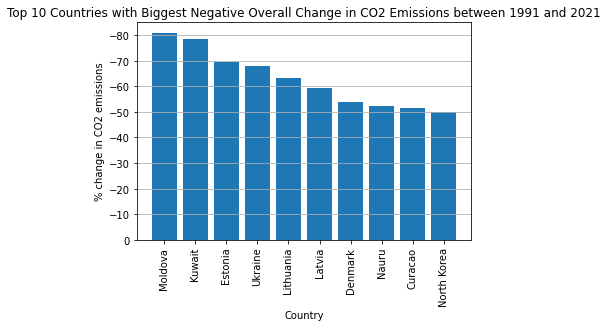

In [ ]:
fig = plt.figure()
fig, ax = plt.subplots()
plt.gca().invert_yaxis()

ax.bar(big_change.iloc[0:10, -1], big_change.iloc[0:10, -2])


plt.xticks(rotation = 90)
ax.yaxis.grid(True)
ax.set_ylabel("% change in CO2 emissions")
ax.set_xlabel("Country")
ax.set_title("Top 10 Countries with Biggest Negative Overall Change in CO2 Emissions between 1991 and 2021")

Text(0.5, 1.0, 'Top 10 Countries with Biggest Negative Change per capita in CO2 Emissions between 1991 and 2021')

<Figure size 432x288 with 0 Axes>

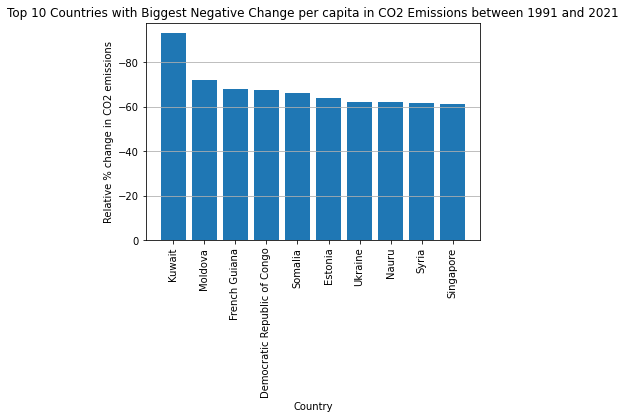

In [ ]:
fig1 = plt.figure()
fig1, ax = plt.subplots()
plt.gca().invert_yaxis()

ax.bar(cap_big_change.iloc[0:10, -1], cap_big_change.iloc[0:10, -2])


plt.xticks(rotation = 90)
ax.yaxis.grid(True)
ax.set_ylabel("Relative % change in CO2 emissions")
ax.set_xlabel("Country")
ax.set_title("Top 10 Countries with Biggest Negative Change per capita in CO2 Emissions between 1991 and 2021")

# Which non-fossil fuel energy technology will have the best price in the future?

In [ ]:
cost.drop(columns = 'Code', inplace = True)
cost.columns = ['country', 'year', 'bioenergy', 'geothermal', 'offshore_wind', 'solar_photovoltaic', 'solar_concentrated', 'hydropower', 'onshore_wind']

# Only consider world cost
world_cost = cost[cost['country'].str.contains('World')]

# drop years with no data for world
world_cost = world_cost.dropna()

world_cost

,country,year,bioenergy,geothermal,offshore_wind,solar_photovoltaic,solar_concentrated,hydropower,onshore_wind
447,World,2010,0.078189,0.050445,0.187857,0.417149,0.358004,0.038883,0.102061
449,World,2012,0.061879,0.085695,0.166601,0.232633,0.337574,0.038038,0.088390
450,World,2013,0.082198,0.064111,0.166662,0.179401,0.248888,0.042512,0.089206
451,World,2014,0.082375,0.065335,0.172199,0.161258,0.216377,0.042457,0.080203
452,World,2015,0.072771,0.058849,0.140527,0.121080,0.223889,0.036572,0.068962
453,World,2016,0.071178,0.067802,0.116323,0.106340,0.247269,0.048389,0.063855
454,World,2017,0.071070,0.070917,0.106152,0.083660,0.206213,0.050722,0.059959
455,World,2018,0.055360,0.067583,0.100049,0.071139,0.149103,0.039837,0.050880
456,World,2019,0.063933,0.067305,0.086388,0.062119,0.211831,0.041409,0.044592
457,World,2020,0.072473,0.054264,0.086266,0.055444,0.106653,0.045966,0.037137


In [ ]:
# Obtain the values to calculate regression
x = world_cost.year
bio_y = world_cost.bioenergy
geo_y = world_cost.geothermal
offwind_y = world_cost.offshore_wind
solarp_y = world_cost.solar_photovoltaic
solarc_y = world_cost.solar_concentrated
hydro_y = world_cost.hydropower
onwind_y = world_cost.onshore_wind

# Reshape to allow regression calculation
x = x.values.reshape(11, 1)
bio_y = bio_y.values.reshape(11, 1)
geo_y = geo_y.values.reshape(11, 1)
offwind_y = offwind_y.values.reshape(11, 1)
solarp_y = solarp_y.values.reshape(11, 1)
solarc_y = solarc_y.values.reshape(11, 1)
hydro_y = hydro_y.values.reshape(11, 1)
onwind_y = onwind_y.values.reshape(11, 1)


regression = LinearRegression()
regression.fit(x, bio_y)

# Regression scores (how reliable is the model (1 is best))
# regression.score(x, bio_y)

# bio = 0.19828806873418026
# geo = -0.5352222105990061
# offwind = -2.0059096631641977
# solarp = -0.382732178353395
# solarc = -3.755520066924249
# hydro = -39.83517310496788
# onwind = 0.23528250692492725

# Regression coefficients (how reliable is the model (1 is best))
regression.coef_

# bio = -0.00107333
# geo = 1.05934023e-05
# offwind = -0.01128525
# solarp = -0.02811664
# solarc = -0.0210397
# hydro = 0.00073213
# onwind = -0.00651689

array([[-0.00107333]])

<Figure size 432x288 with 0 Axes>

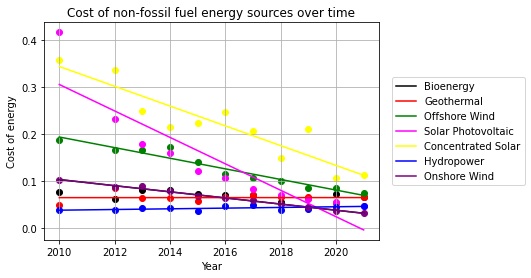

In [ ]:
fig2 = plt.figure()
fig2, ax = plt.subplots()

# bioenergy regression
plt.scatter(x, bio_y,  color='black')
plt.plot(x, regression.predict(x), color='black', label="Bioenergy")

# geothermal regression
regression.fit(x, geo_y)
plt.scatter(x, geo_y,  color='red')
plt.plot(x, regression.predict(x), color='red', label="Geothermal")

# offshore wind regression
regression.fit(x, offwind_y)
plt.scatter(x, offwind_y,  color='green')
plt.plot(x, regression.predict(x), color='green', label="Offshore Wind")

# solar photovoltaic regression
regression.fit(x, solarp_y)
plt.scatter(x, solarp_y,  color='magenta')
plt.plot(x, regression.predict(x), color='magenta', label="Solar Photovoltaic")

# solar concentrated regression
regression.fit(x, solarc_y)
plt.scatter(x, solarc_y,  color='yellow')
plt.plot(x, regression.predict(x), color='yellow', label="Concentrated Solar")

# hydropower regression
regression.fit(x, hydro_y)
plt.scatter(x, hydro_y,  color='blue')
plt.plot(x, regression.predict(x), color='blue', label="Hydropower")

# onshore wind regression 
regression.fit(x, onwind_y)
plt.scatter(x, onwind_y,  color='purple')
plt.plot(x, regression.predict(x), color='purple', label="Onshore Wind")



ax.grid(True)
ax.set_ylabel("Cost of energy")
ax.set_xlabel("Year")
ax.set_title("Cost of non-fossil fuel energy sources over time")
plt.legend(loc='center right', bbox_to_anchor=(1.45, 0.5))